In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import figure

%matplotlib inline

# Part A

In [15]:
def ICV_img_histogram(img,plot_bool):
    
    # array to store number of times a color appears in an image
    color_freq = np.zeros((256,3))
        
    # build and display histogram for R,G and B separately
    color_list = ['Red channel','Green channel','Blue channel']
    for rgb in range(3):
        
        img_to_consider = img[:,:,rgb]
        # go through each pixel in the image and 1 to color_freq for the color that appears
        for i in range(img_to_consider.shape[0]):
            for j in range(img_to_consider.shape[1]):
                color_freq[img_to_consider[i,j],rgb] = color_freq[img_to_consider[i,j],rgb] + 1
    
    x_Axis = np.arange(256).reshape(-1,1)
    if(plot_bool==True):
        # use pyplot.bar to make histogram
        fig = plt.figure(figsize=(15, 15), dpi=80)
        plt.bar(np.squeeze(x_Axis), color_freq[:,0], alpha = 0.33, color='red')
        plt.bar(np.squeeze(x_Axis), color_freq[:,1], alpha = 0.33, color='green')
        plt.bar(np.squeeze(x_Axis), color_freq[:,2], alpha = 0.33, color='blue')
        plt.xlabel("Intensity Bins")
        plt.ylabel("Number of pixels in bin")
        plt.title("Image color histogram of original image")
        plt.show()
    
    return x_Axis,color_freq



In [7]:
# load image to test function
vidcap = cv2.VideoCapture('DatasetB.avi')
success,image = vidcap.read()
# convert image in rgb format
# as opencv loads in BGR format by default, we want to show it in RGB.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

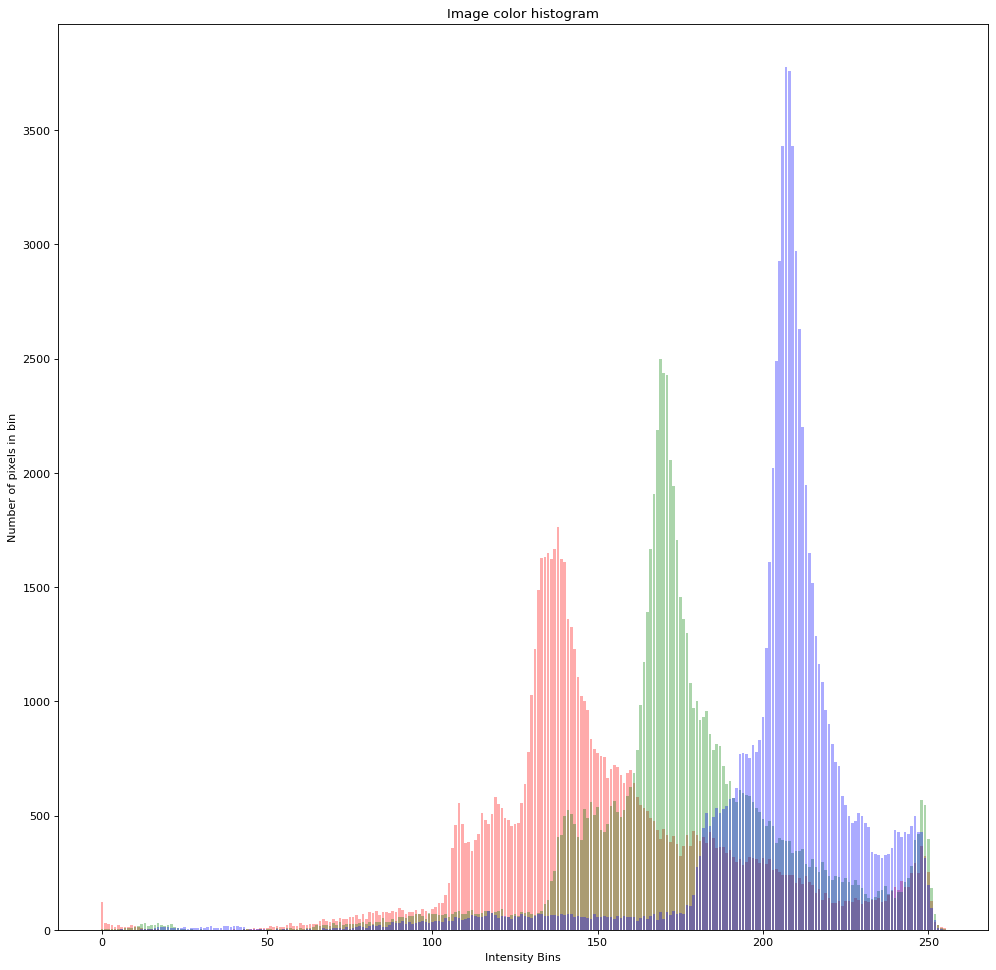

In [8]:
# use 1 bin per pixel value from 0 to 255
x_Axis,color_freq = ICV_img_histogram(image,True)

Frame 0


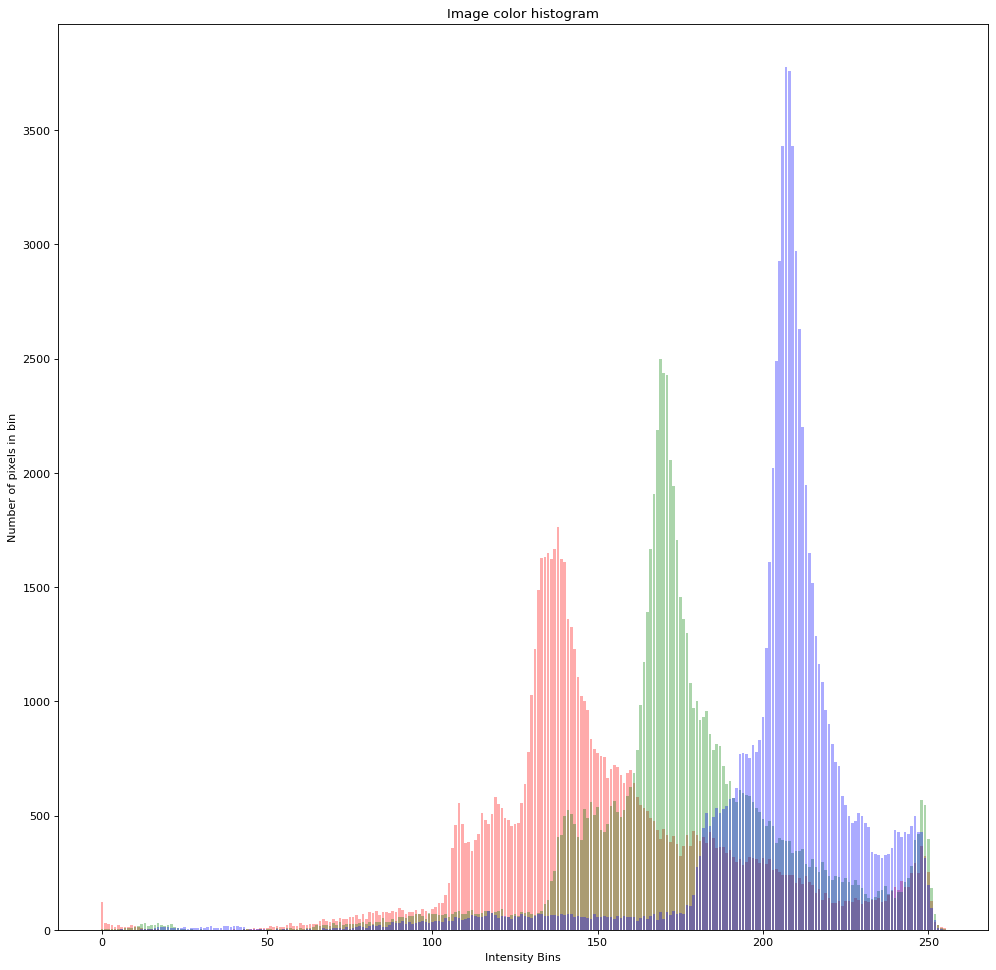

Frame 1


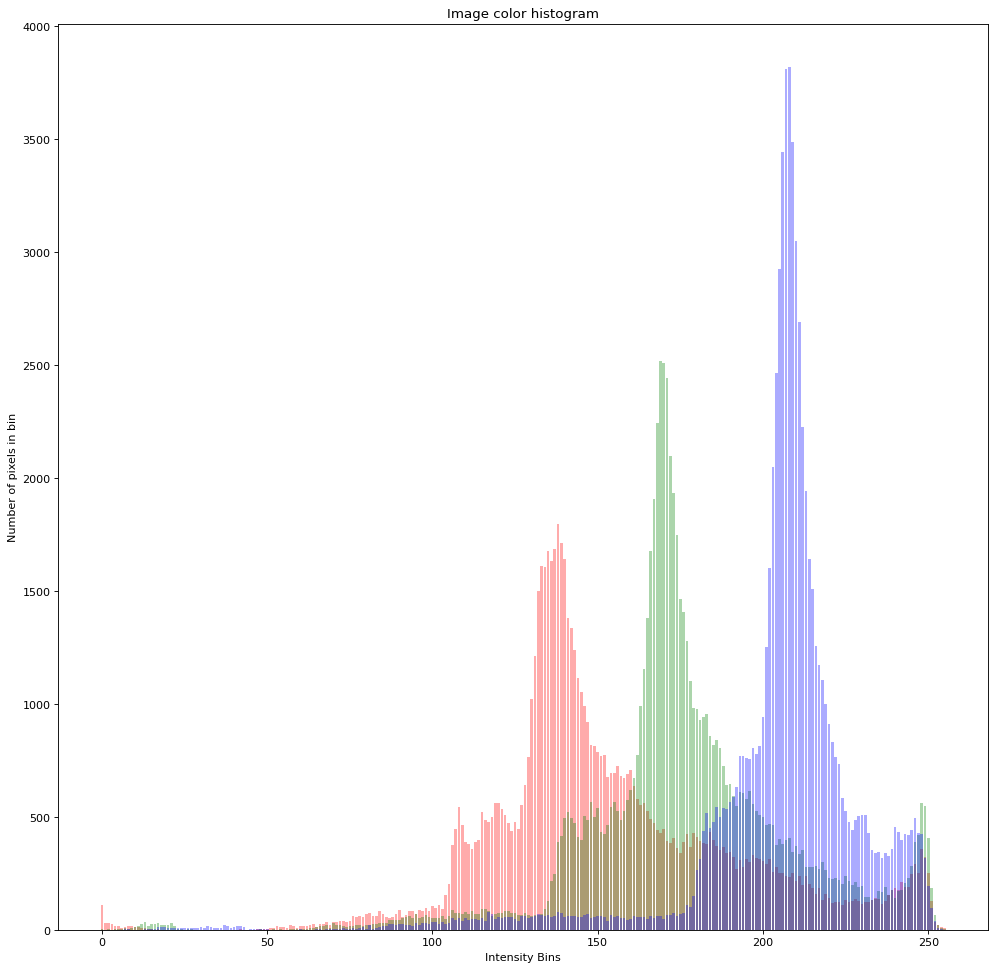

Frame 2


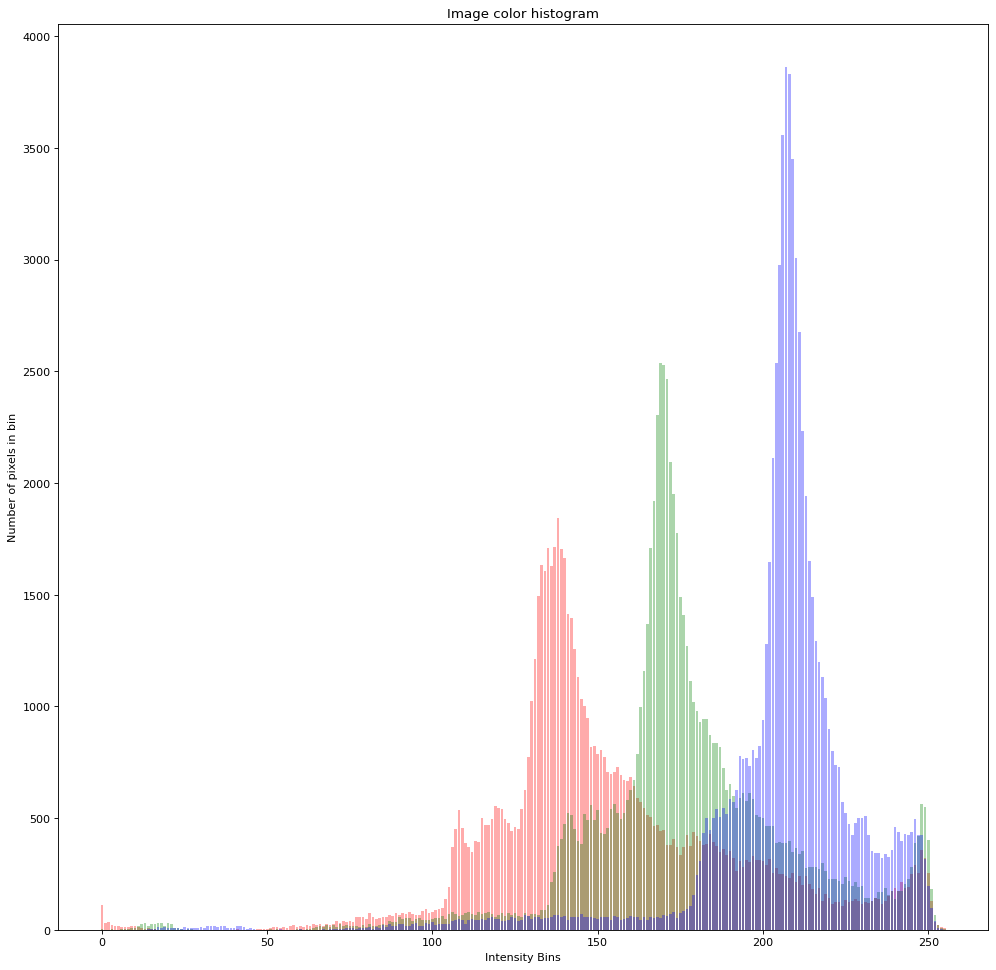

Frame 3


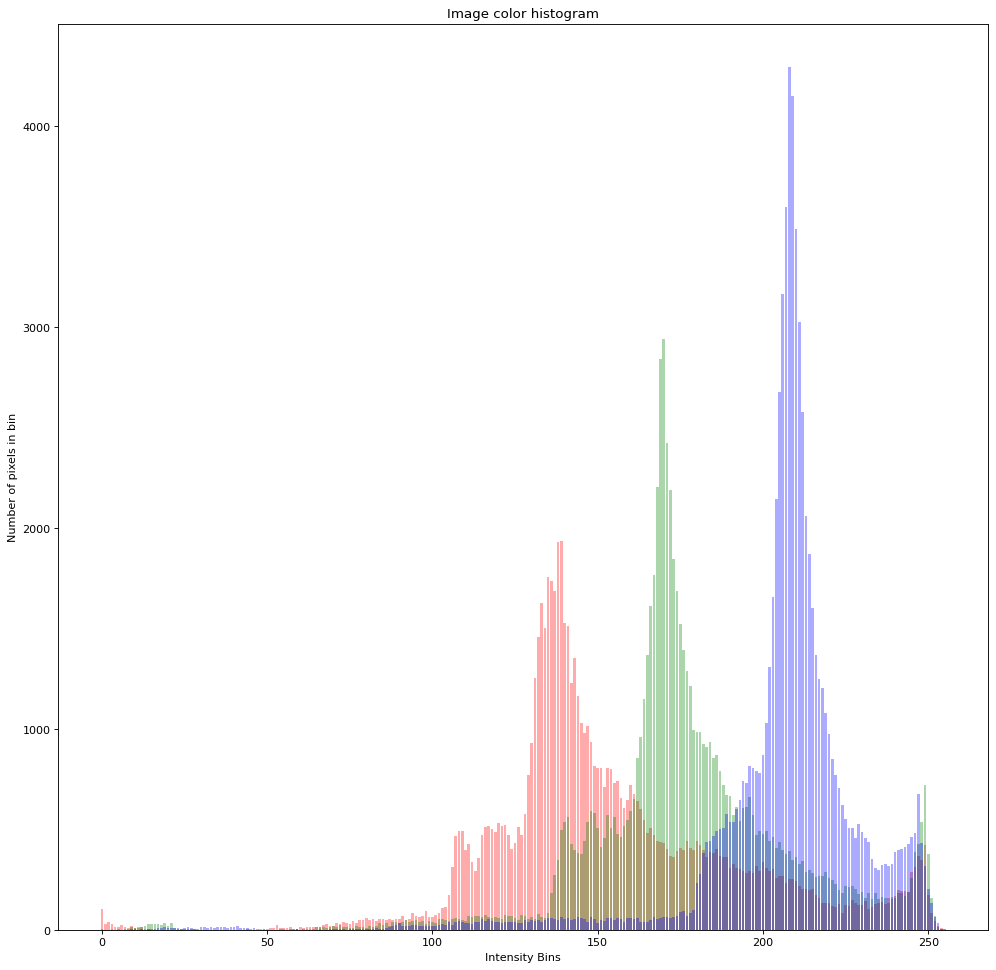

Frame 4


KeyboardInterrupt: 

In [9]:
# go through frames in the vidoe and display histogram:
vidcap = cv2.VideoCapture('DatasetB.avi')
i = 0
while(1):
    print("Frame", i)
    i = i + 1
    success,image = vidcap.read()
    # convert image in rgb format
    # as opencv loads in BGR format by default, we want to show it in RGB.
    
    if(success==False):
        print("break")
        break
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ICV_img_histogram(image,True)
    

# Intersection between histograms

In [16]:
# function to compute intersection between histograms
def ICV_hist_intersection(x_Axis,color_freq_1,color_freq_2,plot_bool):
    red_intersection = np.zeros((256))
    green_intersection = np.zeros((256))
    blue_intersection = np.zeros((256))
    
    for i in range(color_freq.shape[0]):
        red_intersection[i] = np.minimum(color_freq_1[i,0],color_freq_2[i,0])
        green_intersection[i] = np.minimum(color_freq_1[i,1],color_freq_2[i,1])
        blue_intersection[i] = np.minimum(color_freq_1[i,2],color_freq_2[i,2])

    x_Axis = np.arange(256).reshape(-1,1)
    if(plot_bool==True):
        # use pyplot.bar to make histogram
        fig = plt.figure(figsize=(15, 15), dpi=80)
        plt.bar(np.squeeze(x_Axis), red_intersection, alpha = 0.33, color='red')
        plt.bar(np.squeeze(x_Axis), green_intersection, alpha = 0.33, color='green')
        plt.bar(np.squeeze(x_Axis), blue_intersection, alpha = 0.33, color='blue')
        plt.xlabel("Intensity Bins")
        plt.ylabel("Number of pixels in bin")
        plt.title("Histogram intersection")
        plt.show()
    
    red_intersection = np.sum(red_intersection)
    green_intersection = np.sum(green_intersection)
    blue_intersection = np.sum(blue_intersection)
    
    return red_intersection,green_intersection,blue_intersection
    

Frame 0 and Frame 1


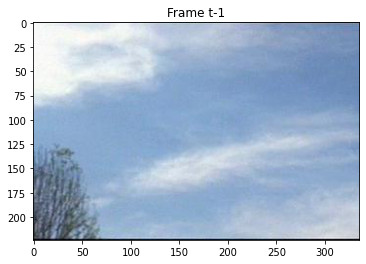

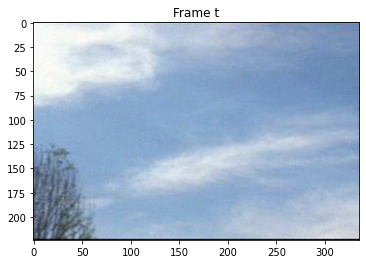

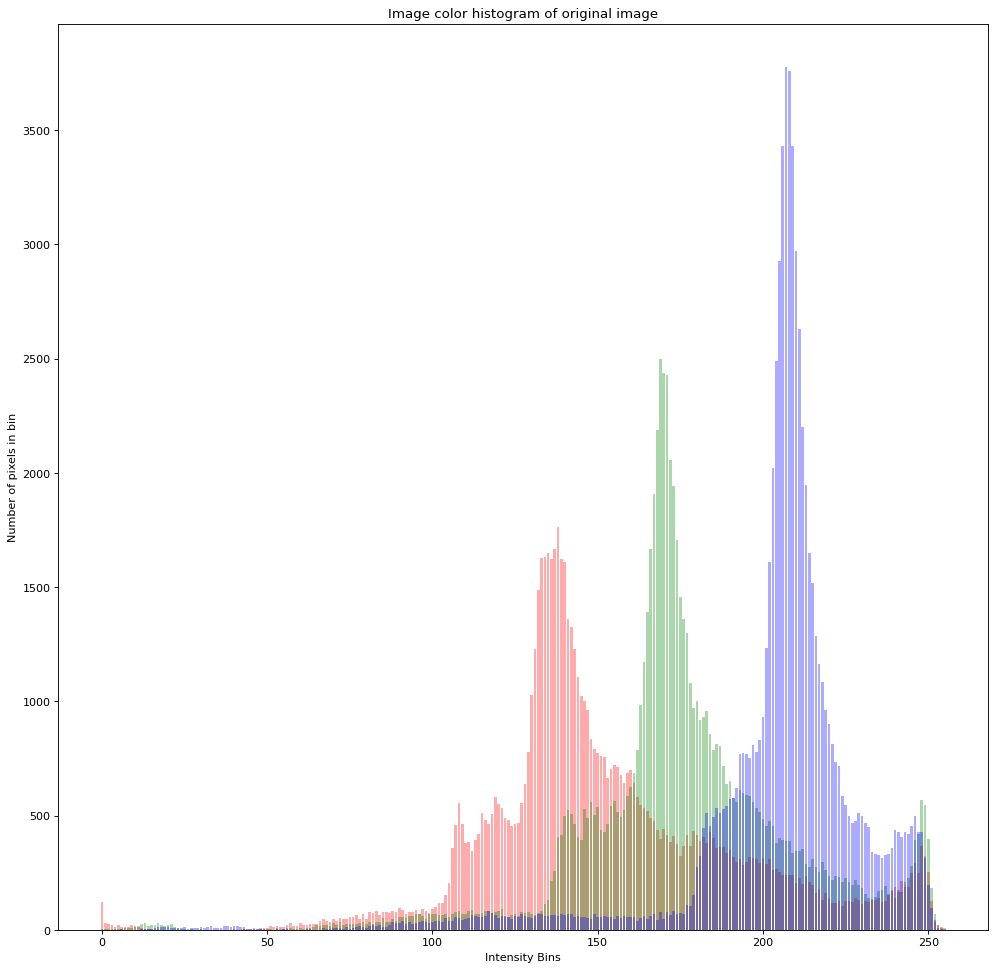

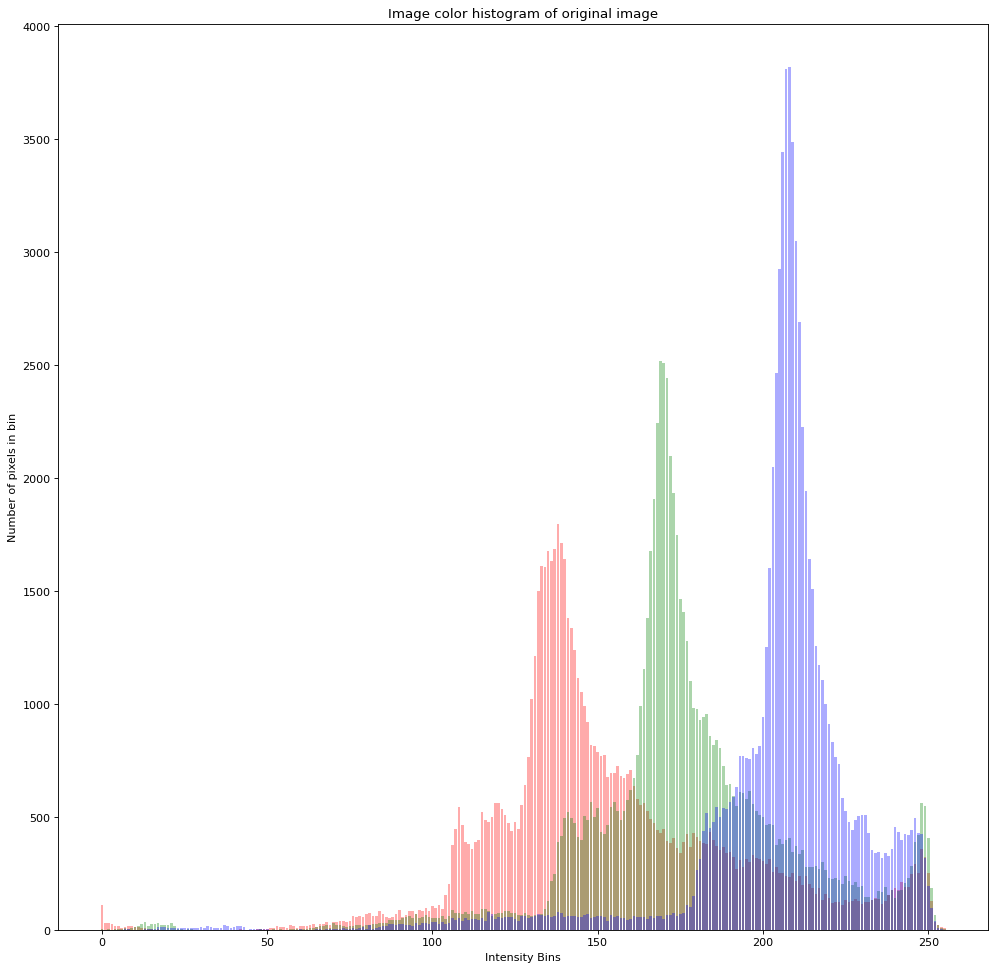

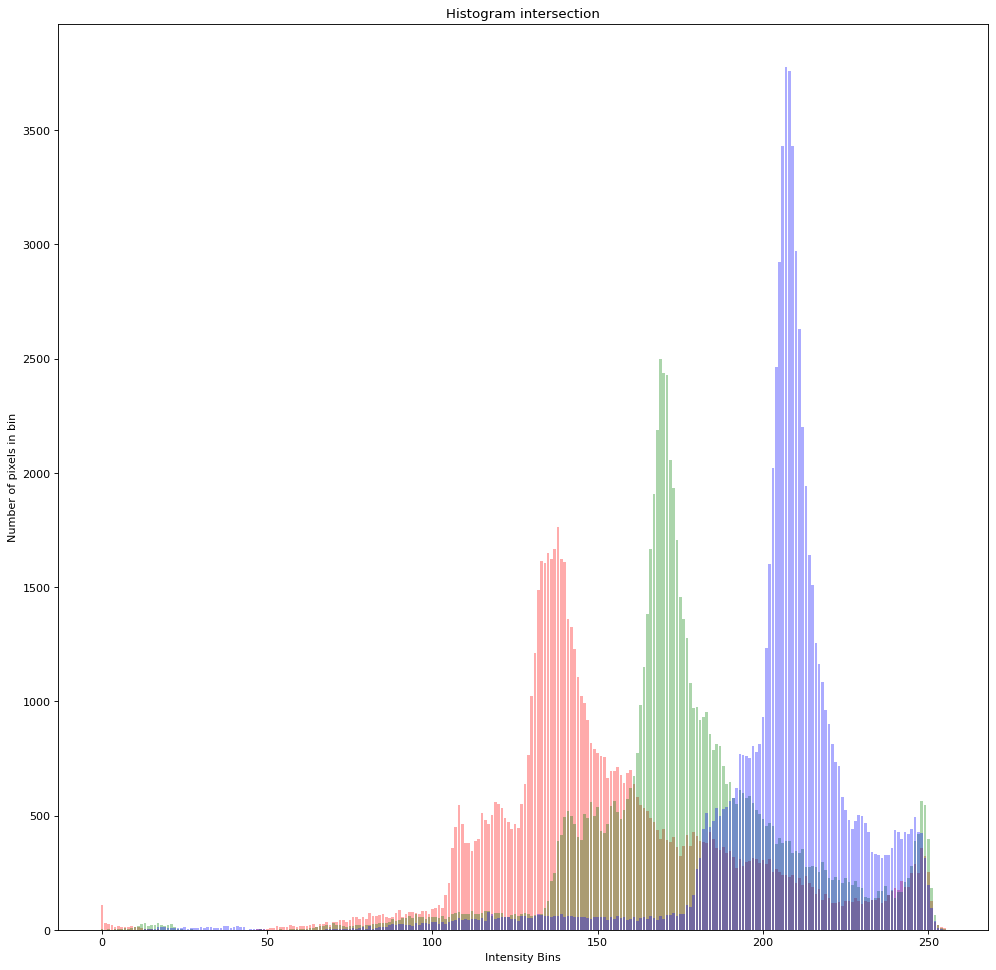

Frame 1 and Frame 2


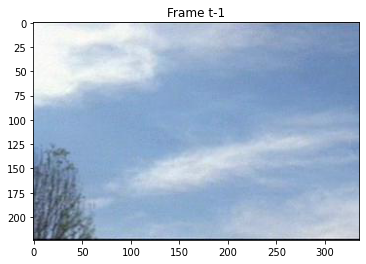

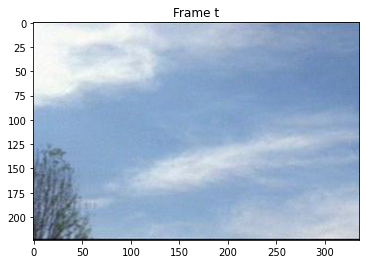

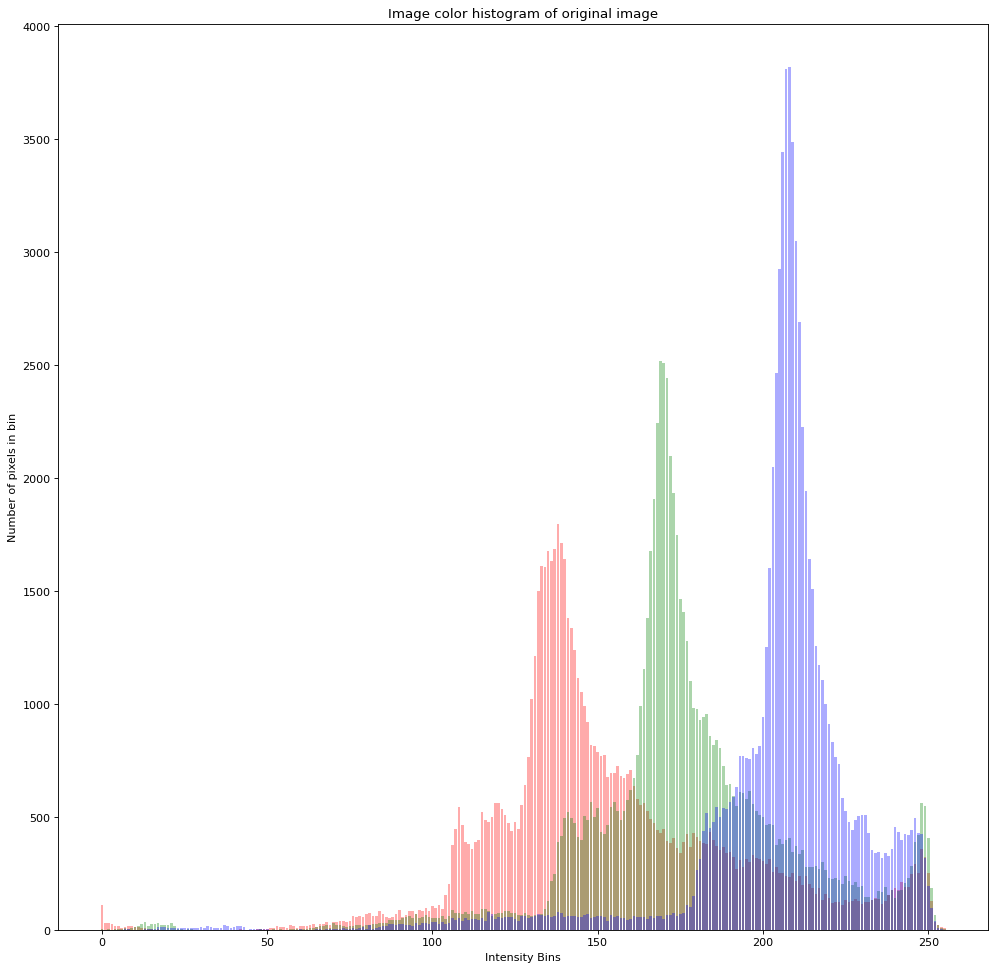

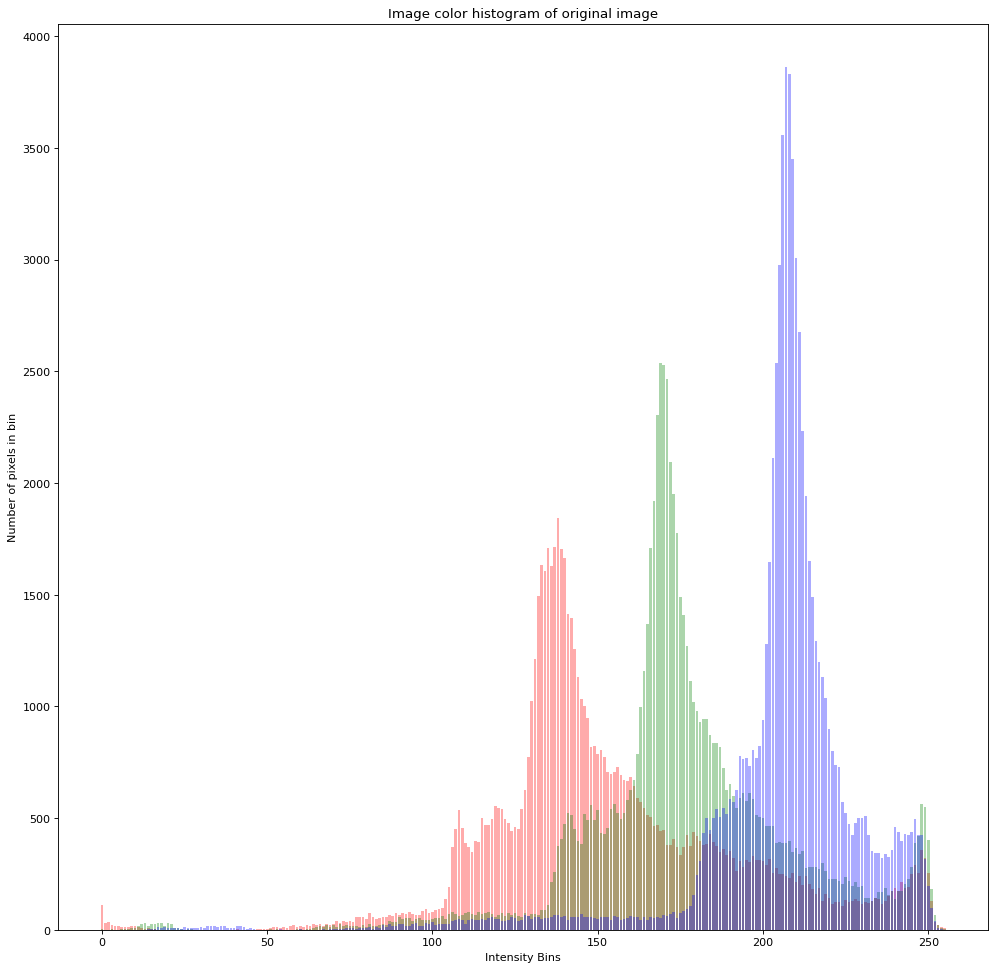

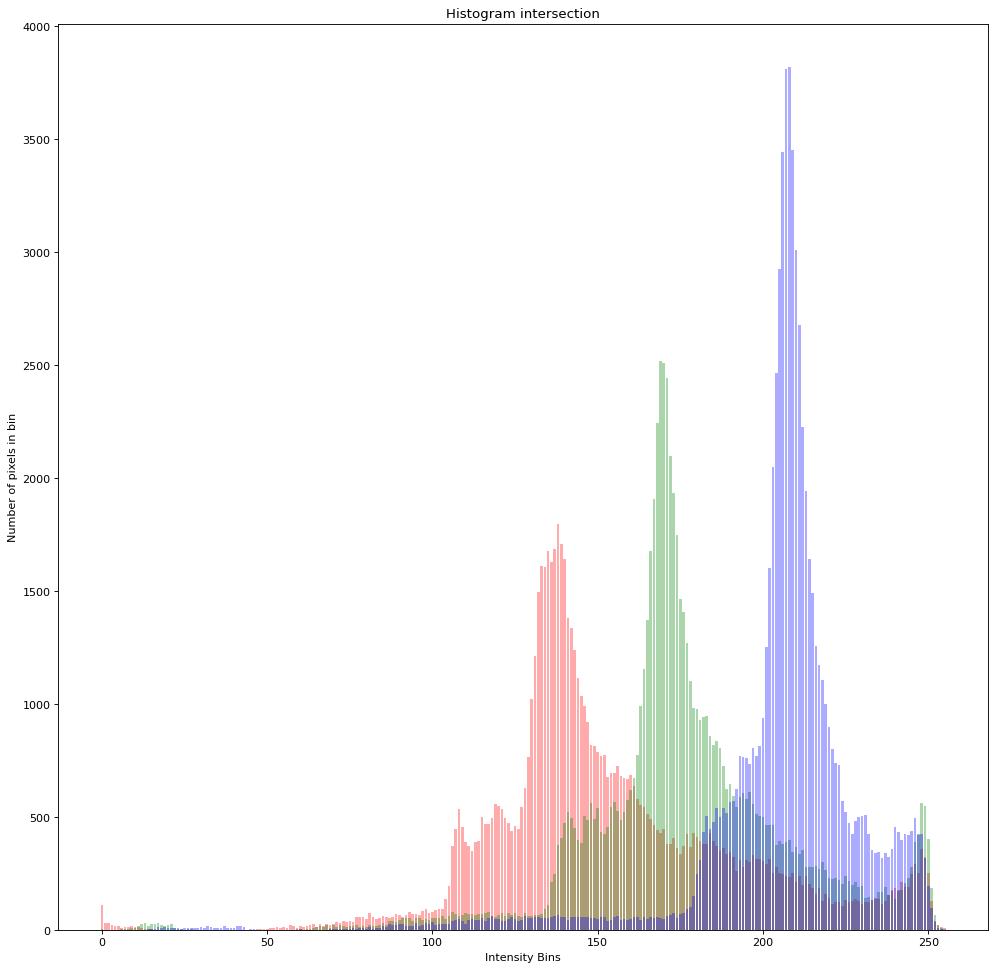

Frame 2 and Frame 3


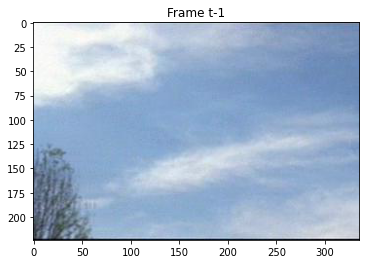

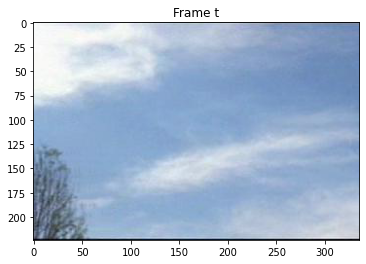

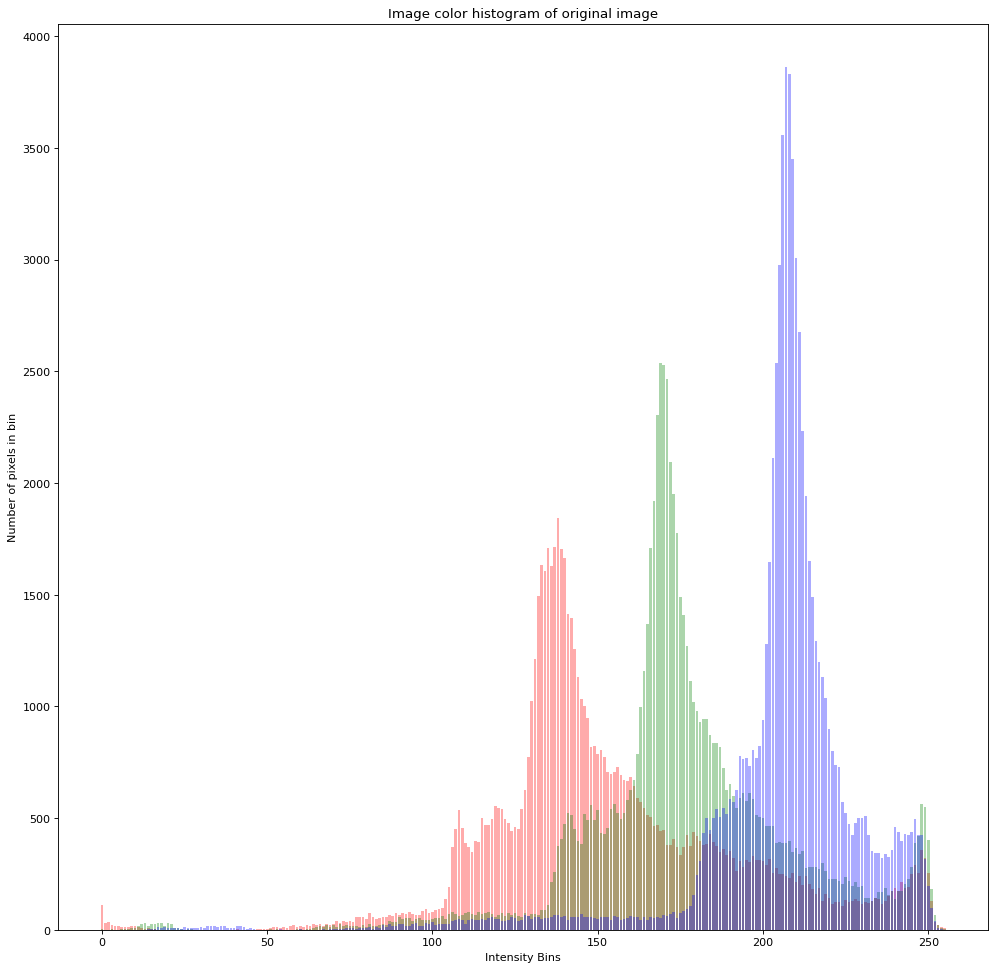

KeyboardInterrupt: 

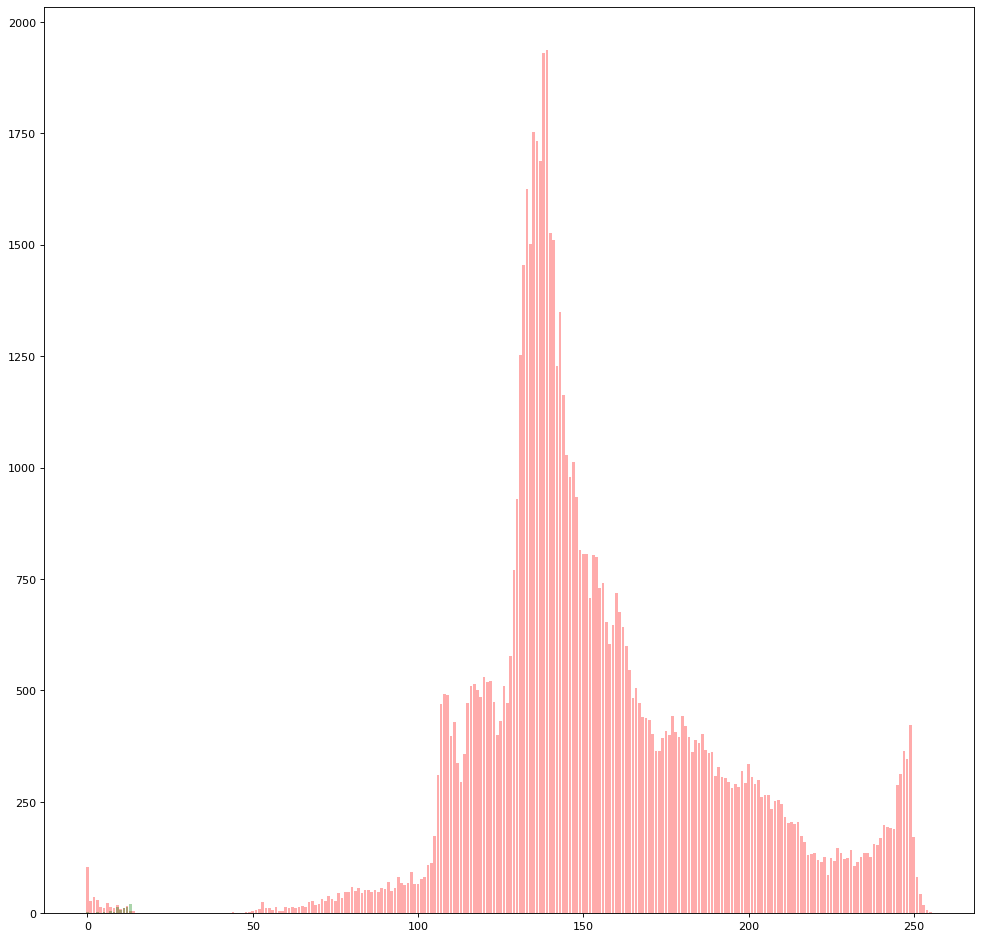

In [22]:
# go through frames in the vidoe and display histogram intersection :
vidcap = cv2.VideoCapture('DatasetB.avi')
i = 0

red_intersection_array = []
green_intersection_array = []
blue_intersection_array = []

# convert image in rgb format
# as opencv loads in BGR format by default, we want to show it in RGB.
success,old_image = vidcap.read()
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)

while(1):
    print("Frame", i ,"and","Frame", i+1)
    i = i + 1
    success,new_image = vidcap.read()
    
    if(success==False):
        print("break")
        break
    
    # convert image in rgb format
    # as opencv loads in BGR format by default, we want to show it in RGB.
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(old_image)
    plt.title("Frame t-1")
    plt.show()
    
    plt.imshow(new_image)
    plt.title("Frame t")
    plt.show()
    
    x_Axis,color_freq1 = ICV_img_histogram(old_image,True)
    x_Axis,color_freq2 = ICV_img_histogram(new_image,True)
    
    red_intersection,green_intersection,blue_intersection = ICV_hist_intersection(x_Axis,color_freq1,color_freq2,True)
    red_intersection_array.append(red_intersection)
    green_intersection_array.append(green_intersection)
    blue_intersection_array.append(blue_intersection)
    
    old_image = new_image


Text(0.5, 1.0, 'intersection between frame i and i+1')

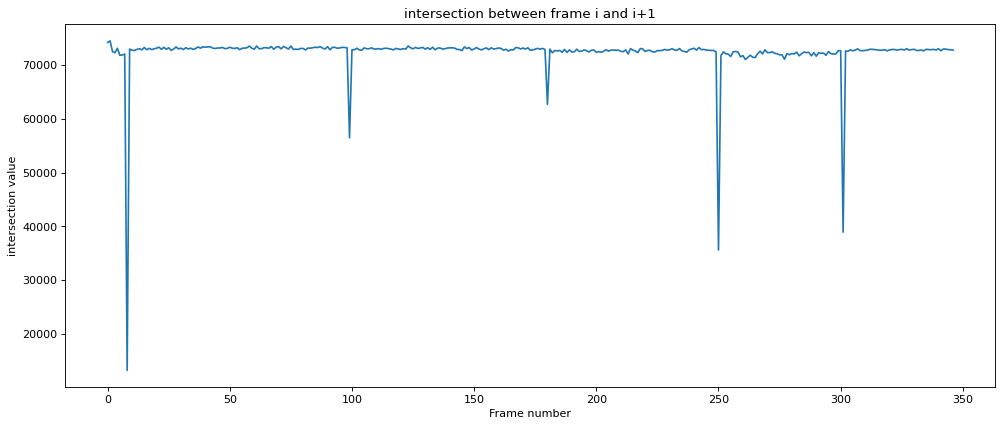

In [12]:
fig = plt.figure(figsize=(15, 6), dpi=80)
plt.plot(red_intersection_array+green_intersection_array+blue_intersection_array)
plt.xlabel("Frame number")
plt.ylabel("intersection value")
plt.title("intersection between frame i and i+1")

# Intersection between histograms after normalization

Frame 0 and Frame 1


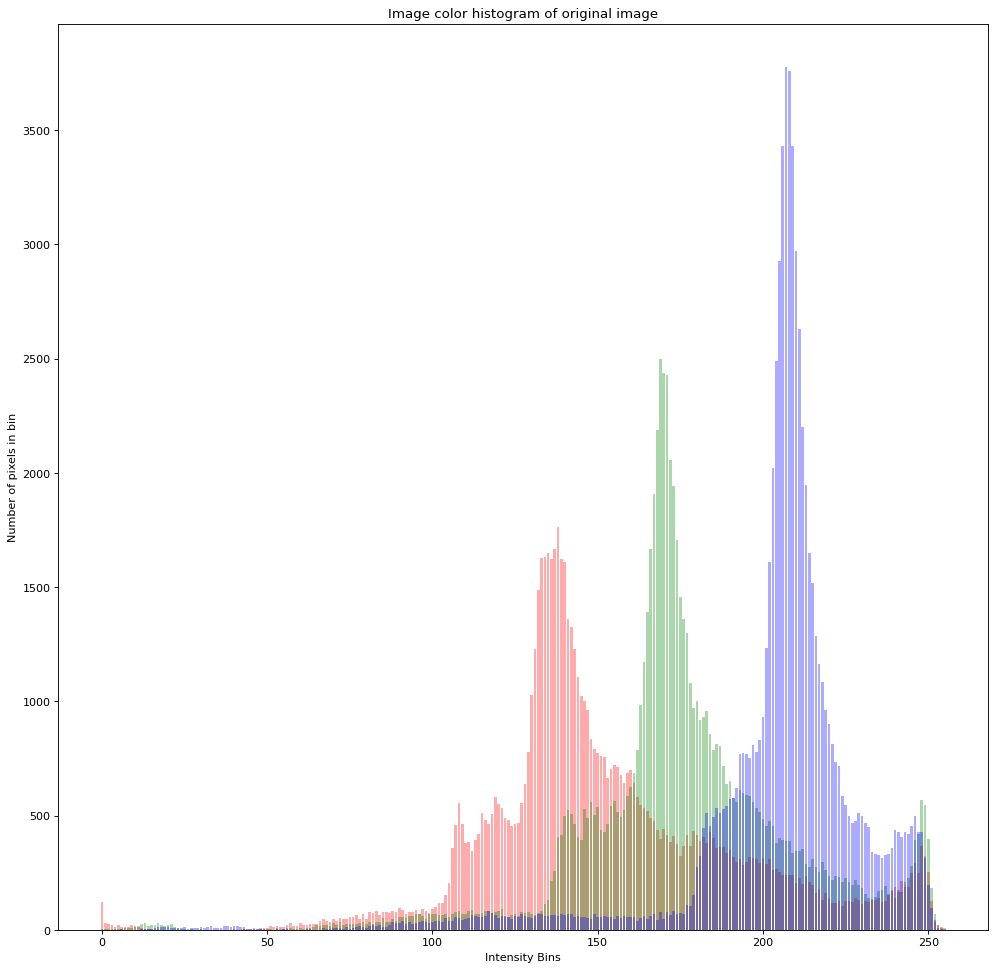

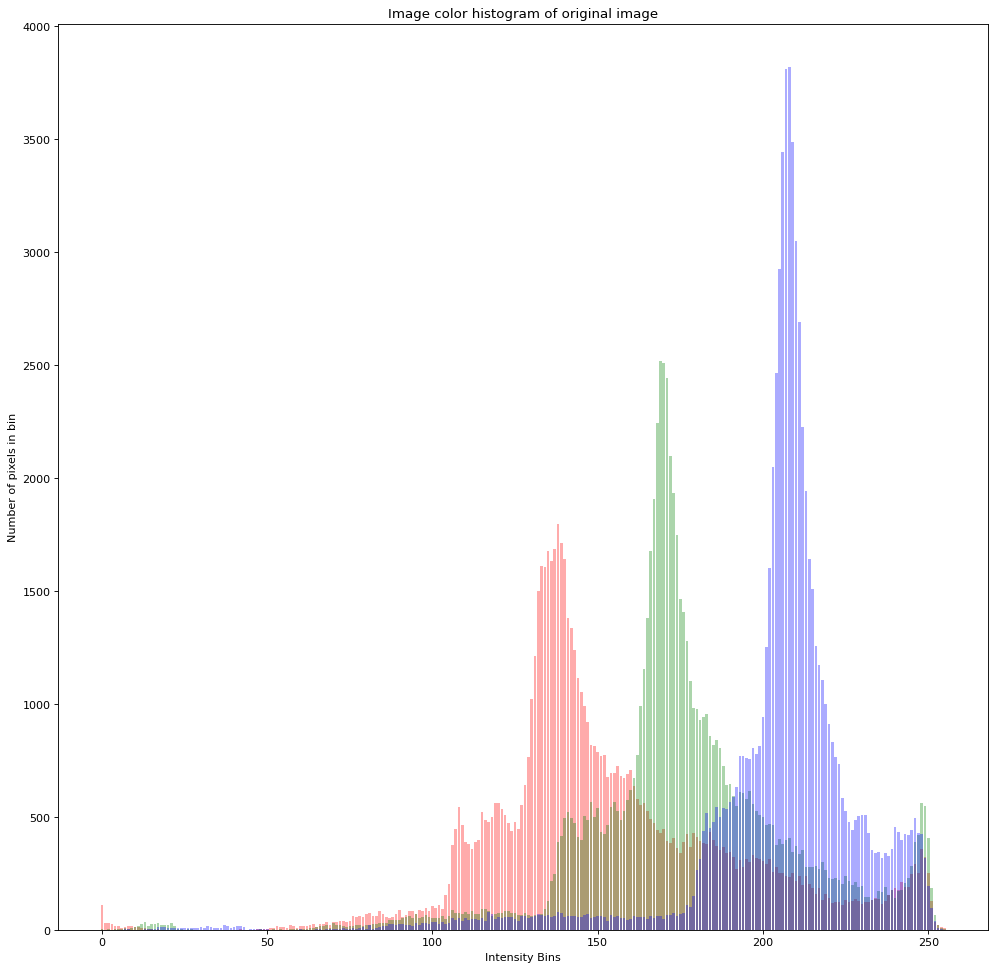

Frame 1 and Frame 2


KeyboardInterrupt: 

In [19]:
# go through frames in the vidoe and display histogram intersection :
vidcap = cv2.VideoCapture('DatasetB.avi')
i = 0

red_intersection_array_norm = []
green_intersection_array_norm = []
blue_intersection_array_norm = []

# convert image in rgb format
# as opencv loads in BGR format by default, we want to show it in RGB.
success,old_image = vidcap.read()
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)

while(1):
    print("Frame", i ,"and","Frame", i+1)
    i = i + 1
    success,new_image = vidcap.read()
    
    if(success==False):
        print("break")
        break
    
    # convert image in rgb format
    # as opencv loads in BGR format by default, we want to show it in RGB.
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    
    x_Axis,color_freq1 = ICV_img_histogram(old_image,True)
    x_Axis,color_freq2 = ICV_img_histogram(new_image,True)

    # normalize frequency of color occurance
    color_freq1 = color_freq1/np.sum(color_freq1,0)
    color_freq2 = color_freq2/np.sum(color_freq2,0)
    
    red_intersection,green_intersection,blue_intersection = ICV_hist_intersection(x_Axis,color_freq1,color_freq2,False)
    red_intersection_array_norm.append(red_intersection)
    
    old_image = new_image


Text(0.5, 1.0, 'intersection between frame i and i+1')

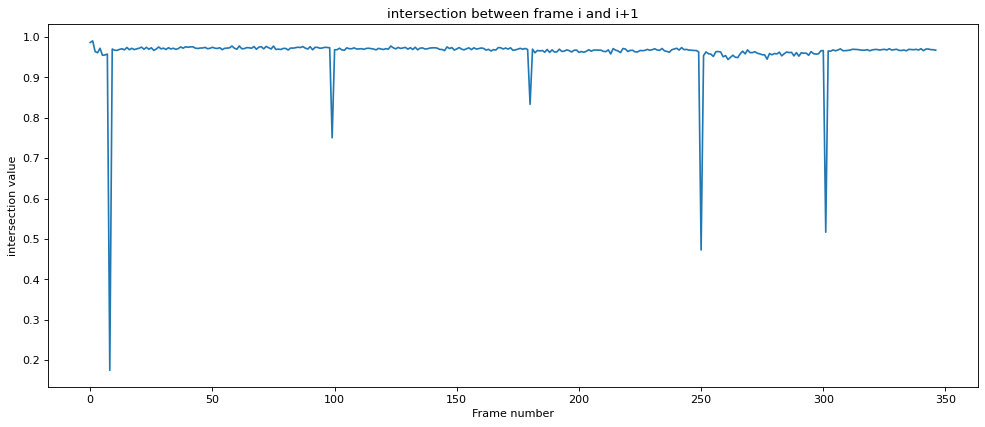

In [14]:
fig = plt.figure(figsize=(15, 6), dpi=80)
plt.plot(red_intersection_array_norm)
plt.xlabel("Frame number")
plt.ylabel("intersection value")
plt.title("intersection between frame i and i+1")